In [1]:
import numpy as np
import matplotlib.pyplot as plt

import fresnel

## 1d diffraction

In [25]:
def calculate_critical_sampling(fresnel_numbers):
    n_crit = 1 / fresnel_numbers

def calculate_critical_distance(n, dx, wl, npad = 2):
    return npad * n * dx ** 2 / wl

def intensity(field):
    return np.square(np.abs(field))

In [75]:
n = 1000 # number of samples
wl = 0.5e-3 # wavelength
dx = 5e-3 # pixel size
length = n * dx
npad = 2

structuresize = 2.5

xx = np.arange(-n//2, n - n//2) * dx



# ideal propagation distance
dz_crit = calculate_critical_distance(n, dx, wl, npad=2)
dz = np.asarray([0.3 * dz_crit, dz_crit, 3 * dz_crit])


Fpix = fresnel.calculate_fresnel_numbers(dx, dz, wl)
print(f"dz_crit: {dz_crit}, dz: {dz}")
print(f"fresnel numbers: {Fpix}")

dz_crit: 100.0, dz: [ 30. 100. 300.]
fresnel numbers: [0.00166667 0.0005     0.00016667]


In [63]:
aperture = fresnel.RectangularAperture(structuresize, wl)

u0 = aperture(xx)
shape = u0.shape

# Transfer Function propagator
propTF = fresnel.FresnelTFPropagator(shape, Fpix, npad=npad)

# Impulse Response propagator
propIR = fresnel.FresnelIRPropagator(shape, Fpix, npad=npad)

# ASM does _not_ make the Fresnel-/Paraxial approximation, so Fresnel numbers are not applicable
propASM = fresnel.ASMPropagator(shape, dperp=dx, dz=dz, wl=wl, npad=npad, mask_evanescent=False)

(3, 2000)

In [76]:
# Propagate
upropTF = propTF(u0)
upropIR = propIR(u0)
upropASM = propASM(u0)
uprop_ana = aperture.near_field(xx[np.newaxis,:], dz=dz[:,np.newaxis])

Text(0.5, 0.98, 'Intensity')

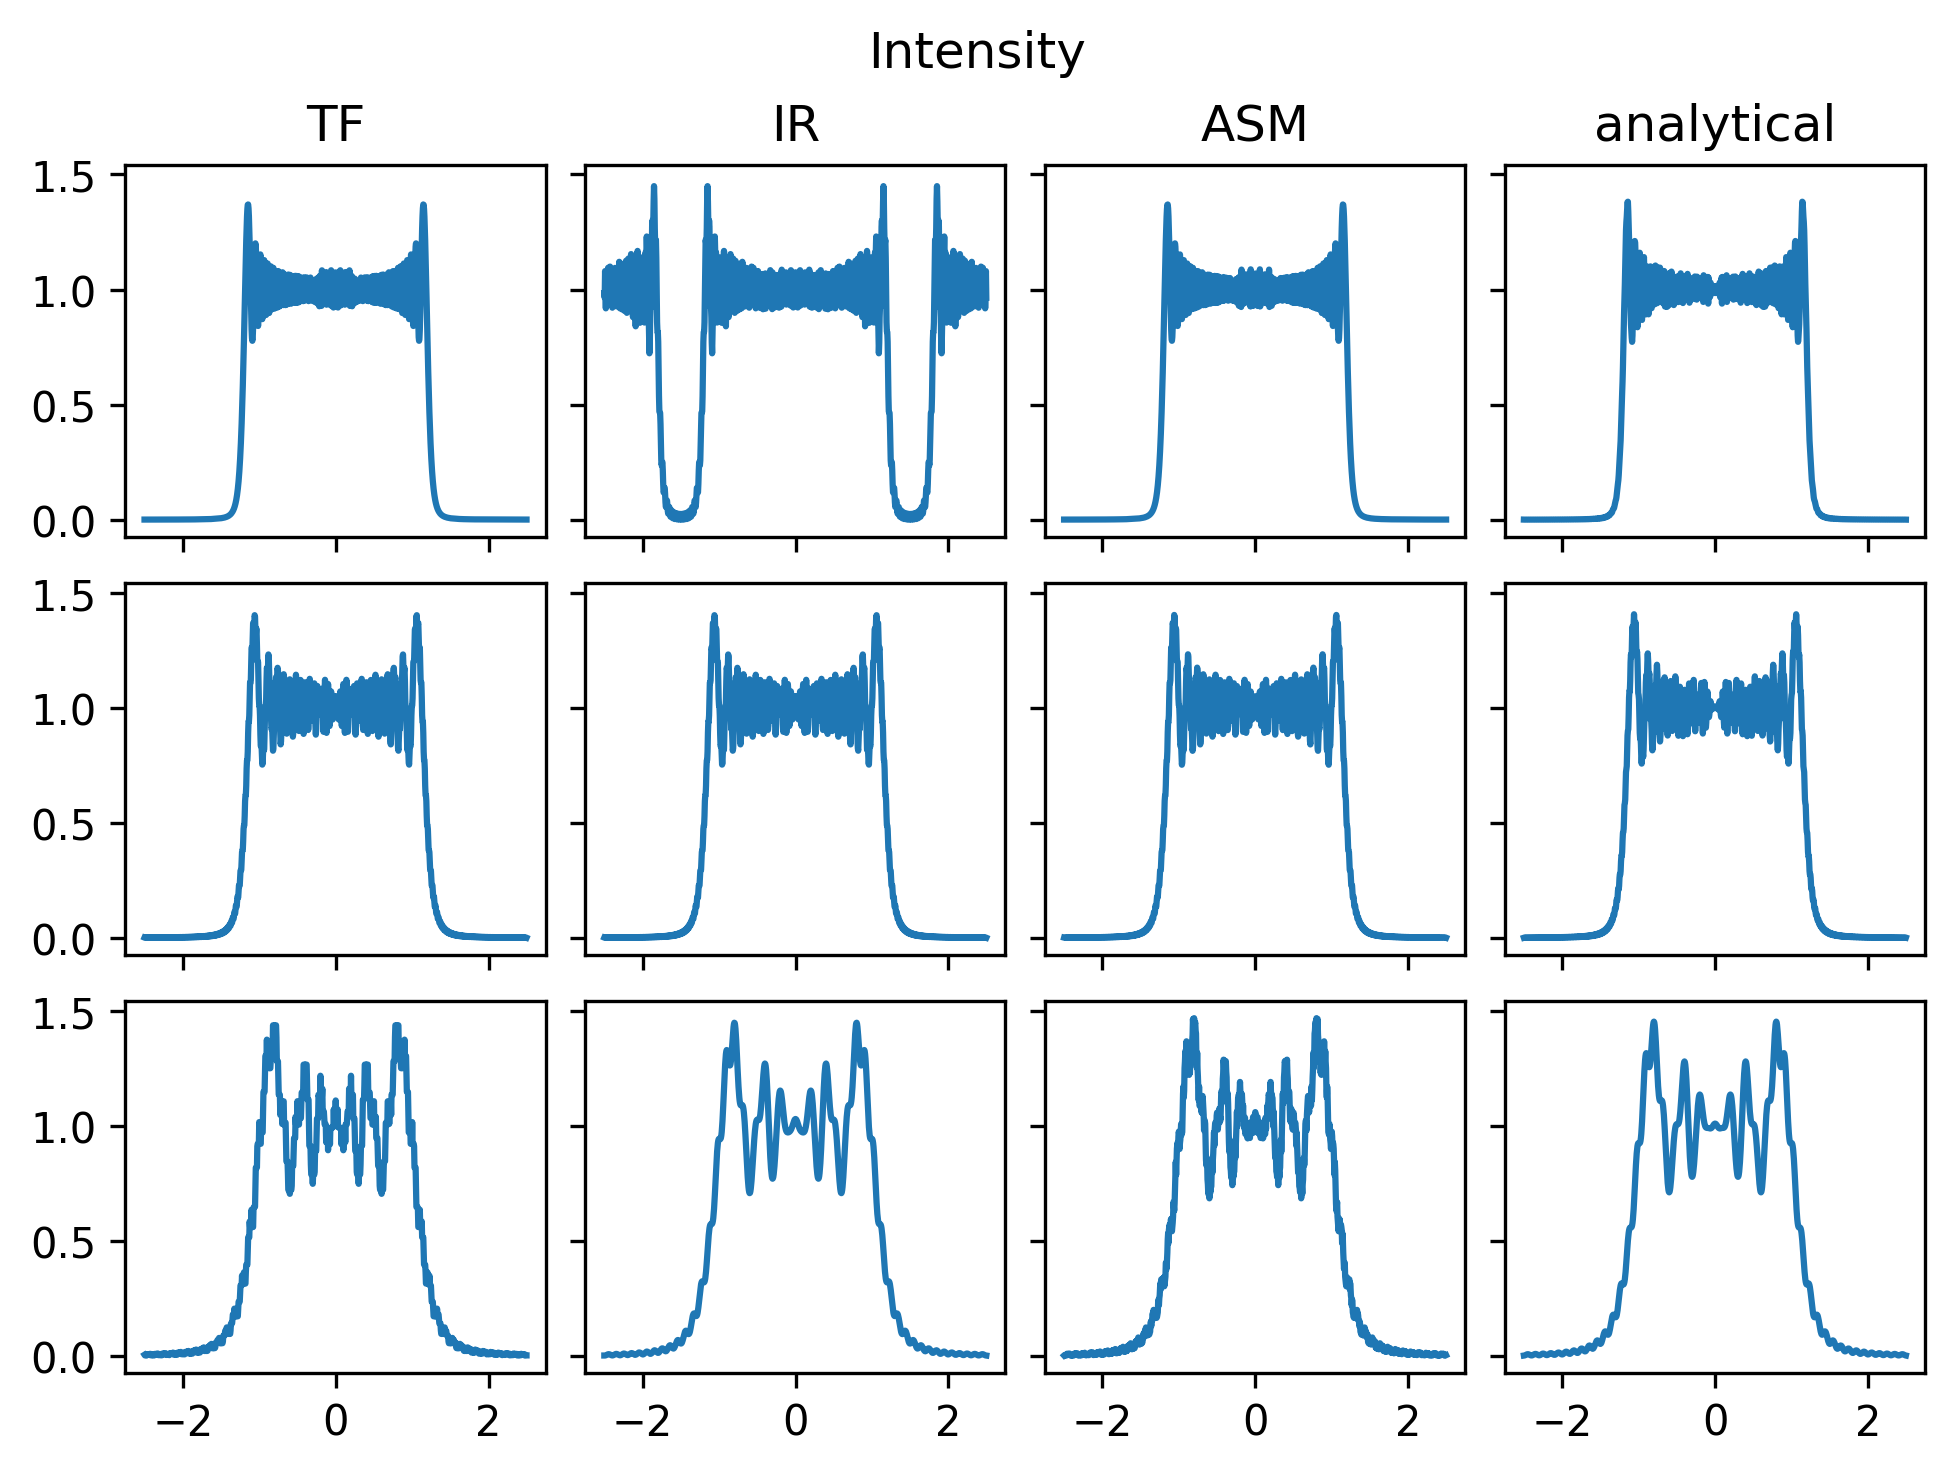

In [60]:
fig, axes = plt.subplots(len(Fpix), 4, dpi=300, sharex=True, sharey=True, layout="constrained")

for i, (ax1, ax2, ax3, ax4) in enumerate(axes):
    ax1.plot(xx.flatten(), intensity(upropTF[i,:]))
    ax2.plot(xx.flatten(), intensity(upropIR[i,:]))
    ax3.plot(xx.flatten(), intensity(upropASM[i,:]))
    ax4.plot(xx.flatten(), intensity(uprop_ana[i,:]))


axes[0][0].set_title('TF')
axes[0][1].set_title('IR')
axes[0][2].set_title('ASM')
axes[0][3].set_title('analytical')

fig.suptitle('Intensity')

Text(0.5, 0.98, 'Phase')

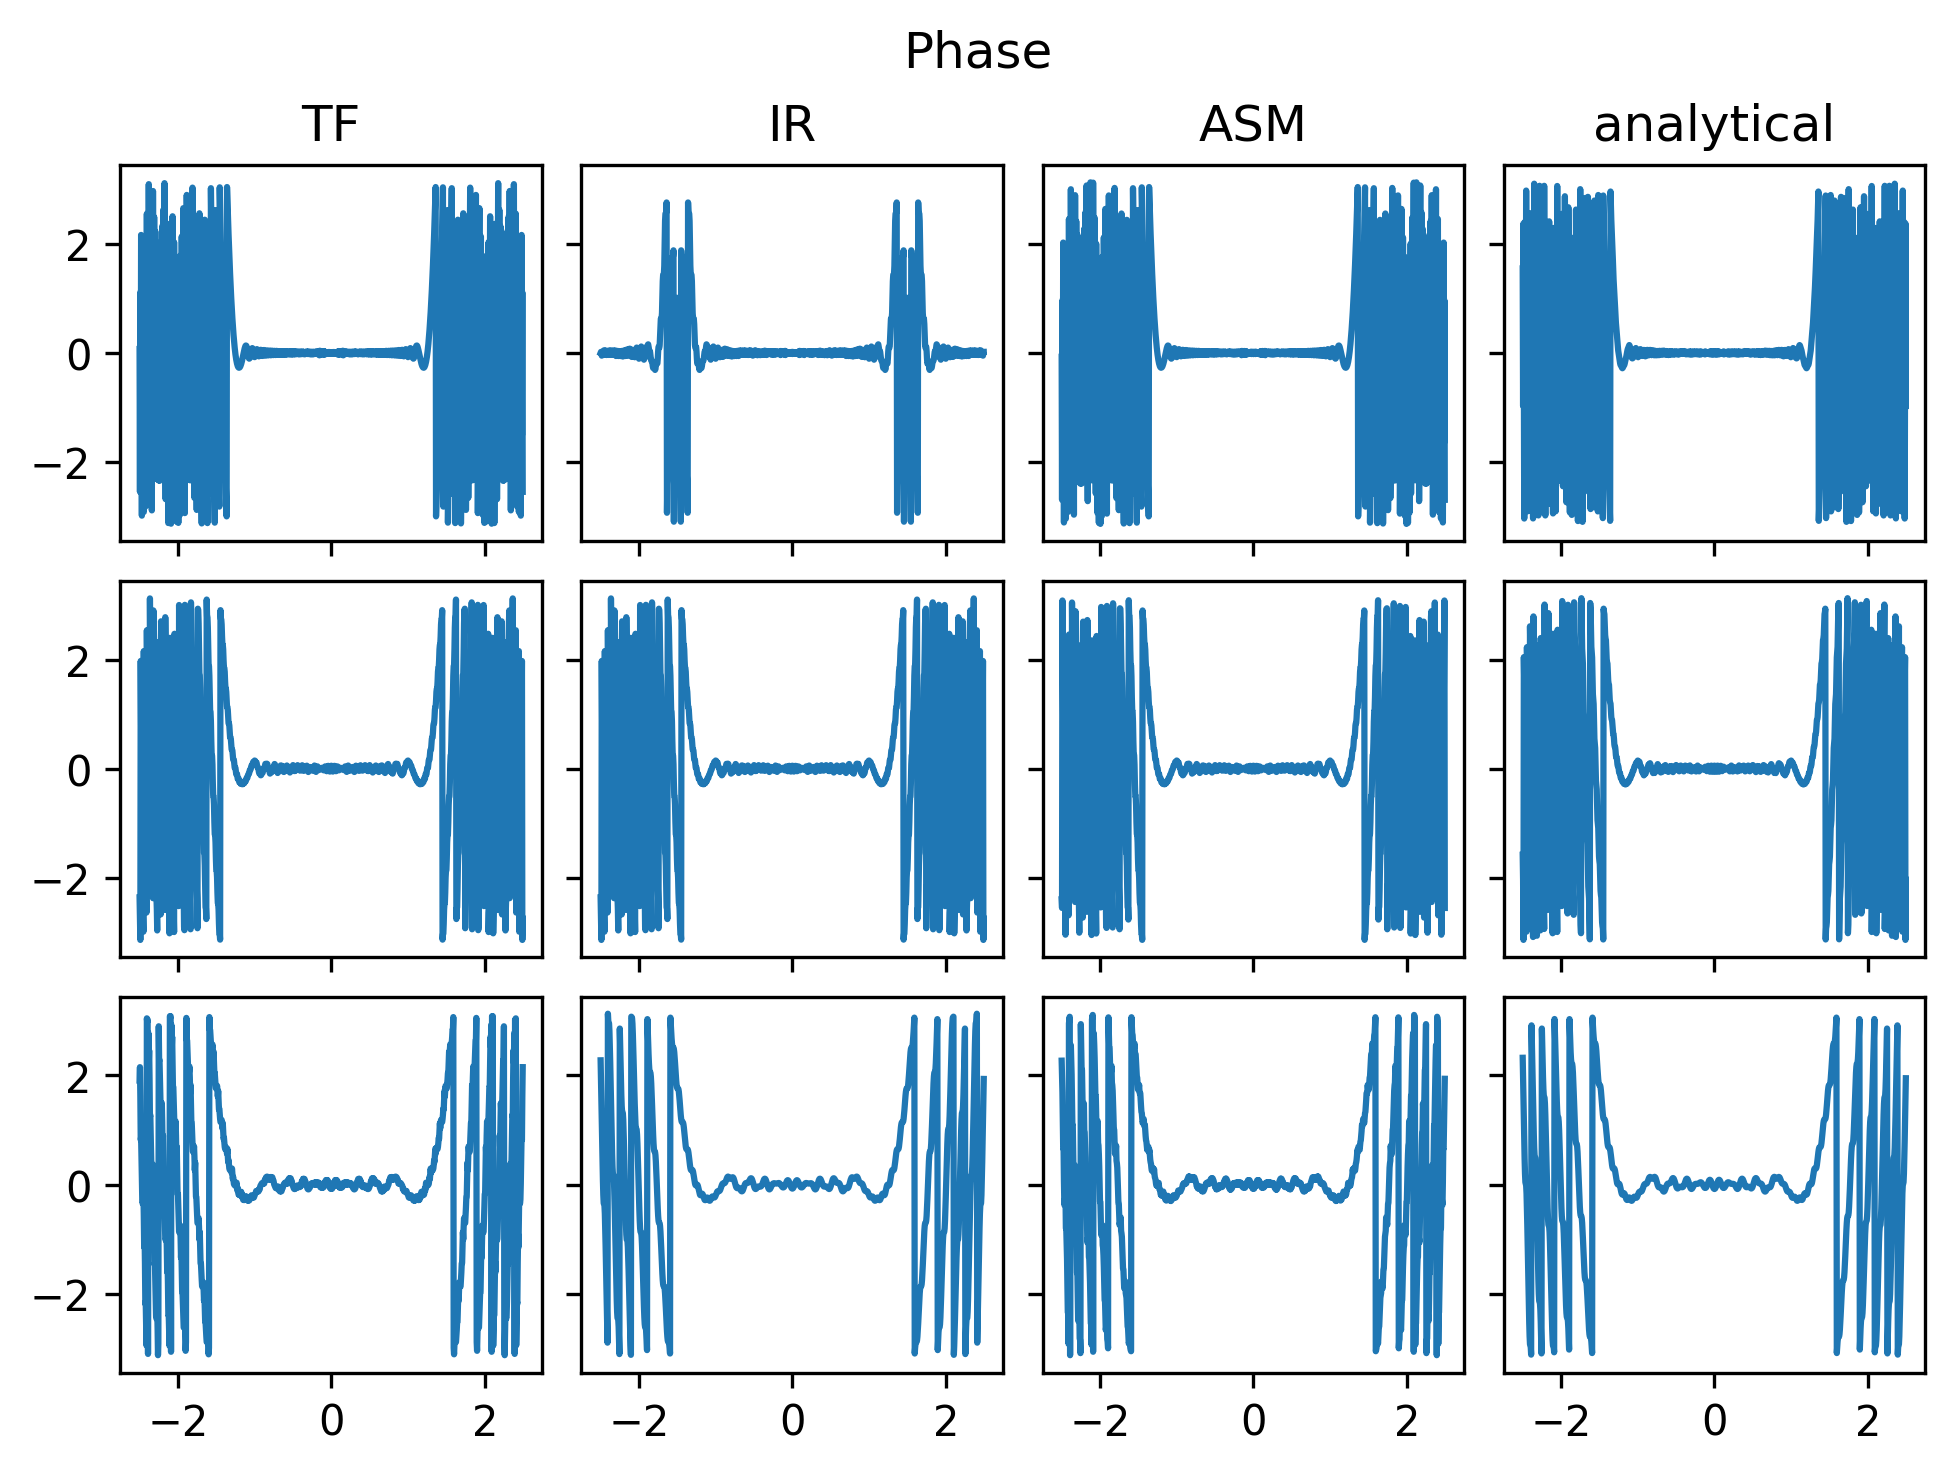

In [77]:
fig, axes = plt.subplots(len(Fpix), 4, dpi=300, sharex=True, sharey=True, layout="constrained")

for i, (ax1, ax2, ax3, ax4) in enumerate(axes):
    ax1.plot(xx.flatten(), np.angle(upropTF[i,:]))
    ax2.plot(xx.flatten(), np.angle(upropIR[i,:]))
    ax3.plot(xx.flatten(), np.angle(upropASM[i,:]))
    ax4.plot(xx.flatten(), np.angle(uprop_ana[i,:]))

axes[0][0].set_title('TF')
axes[0][1].set_title('IR')
axes[0][2].set_title('ASM')
axes[0][3].set_title('analytical')

fig.suptitle('Phase')

## 2d diffraction

Simulate the example from Fig 3 from Voelz and Roggeman (2009)

In [8]:
n = 1000
wl = 0.5e-3 # wavelength
dx = 5e-3 # pixel size
length = n * dx
structuresize = 2.5

x = np.arange(-n//2, n//2) * dx
y = np.arange(-n//2, n//2) * dx
xx, yy = np.meshgrid(x, y, sparse=True)

w = [structuresize, structuresize]

aperture2 = fresnel.RectangularAperture(w, wl)

u0 = aperture2(xx, yy)

npad = 1 # no padding!

# ideal propagation distance
dz_crit = npad * n * dx**2 / wl
print(dz_crit)

dz = np.asarray([30, 100, 300, 400])
Fpix =  fresnel.calculate_fresnel_numbers(dx, dz, wl)

50.0


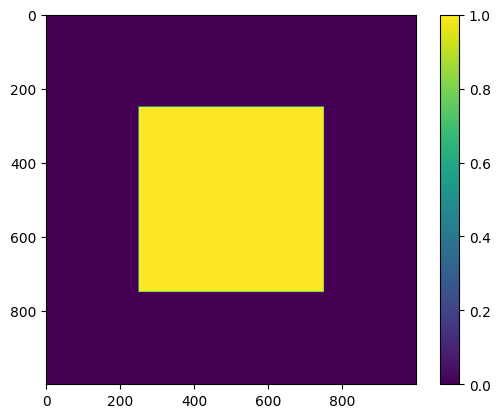

In [9]:
fig, ax = plt.subplots()
im = ax.imshow(intensity(u0))
fig.colorbar(im)

In [10]:
# Transfer function propagator
propTF = fresnel.FresnelTFPropagator(u0.shape, Fpix, npad)
propIR = fresnel.FresnelIRPropagator(u0.shape, Fpix, npad)
propASM = fresnel.ASMPropagator(u0.shape, dperp=(dx, dx), dz=dz, wl=wl, npad=npad, mask_evanescent=False)


upropTF = propTF(u0)
upropIR = propIR(u0)
upropASM = propASM(u0)
uprop_ana = aperture2.near_field(xx[np.newaxis,...], yy[np.newaxis,...], dz=dz.reshape((-1,1,1)))



Text(0.5, 0.98, 'Intensity')

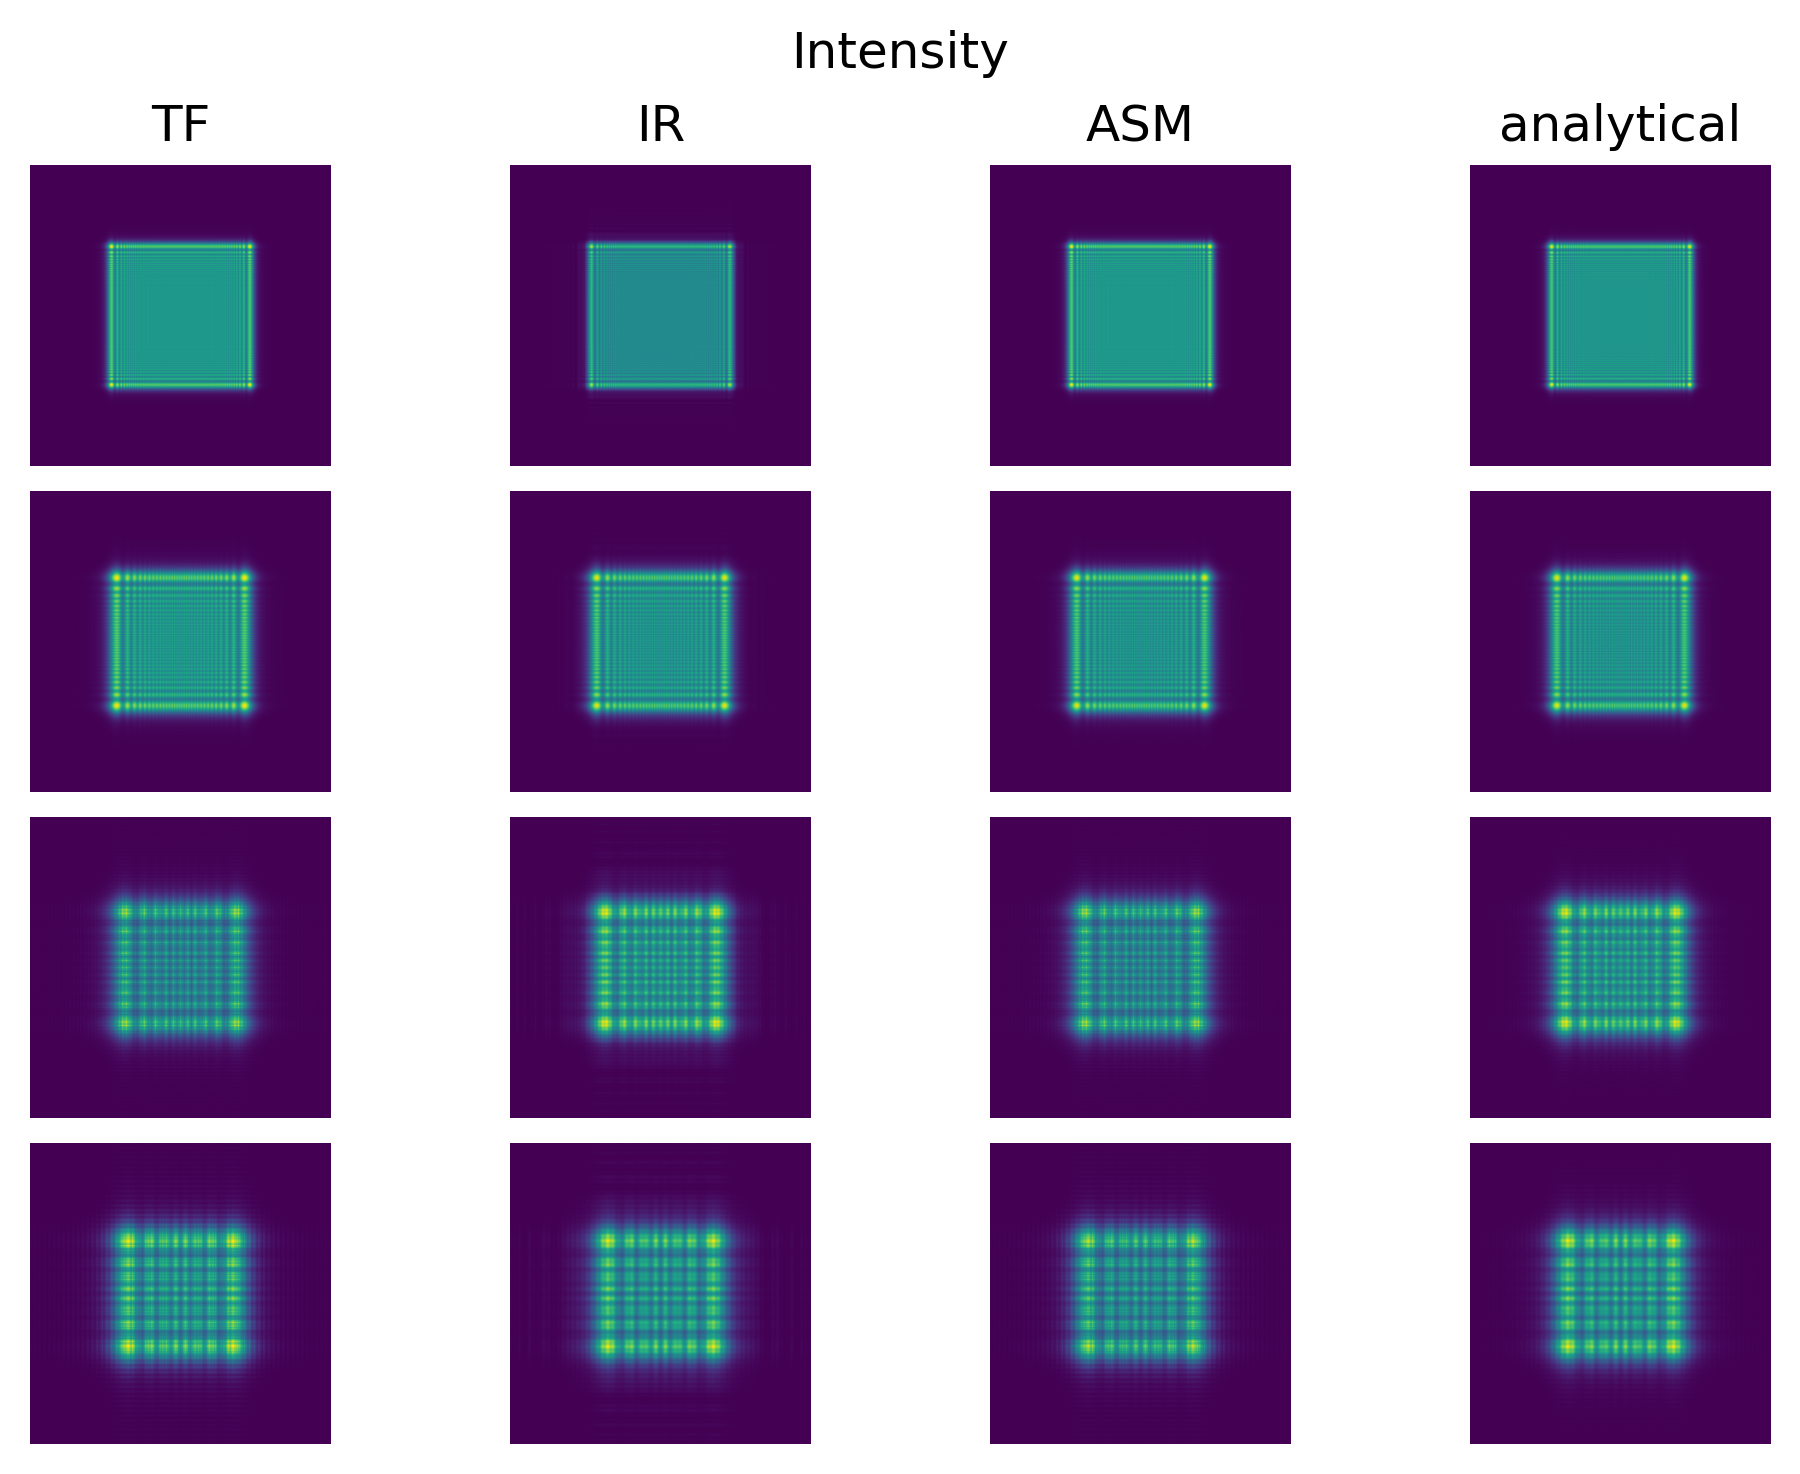

In [11]:
fig, axes = plt.subplots(len(Fpix), 4, dpi=300, sharex=True, sharey=True, layout="constrained")

for i, (ax1, ax2, ax3, ax4) in enumerate(axes):
    ax1.imshow(intensity(upropTF[i,...]))
    ax2.imshow(intensity(upropIR[i,...]))
    ax3.imshow(intensity(upropASM[i,...]))
    ax4.imshow(intensity(uprop_ana[i,:]))

    for ax in (ax1, ax2, ax3, ax4):
        ax.set_axis_off()

axes[0][0].set_title('TF')
axes[0][1].set_title('IR')
axes[0][2].set_title('ASM')
axes[0][3].set_title('analytical')

fig.suptitle('Intensity')

Text(0.5, 0.98, 'Phase')

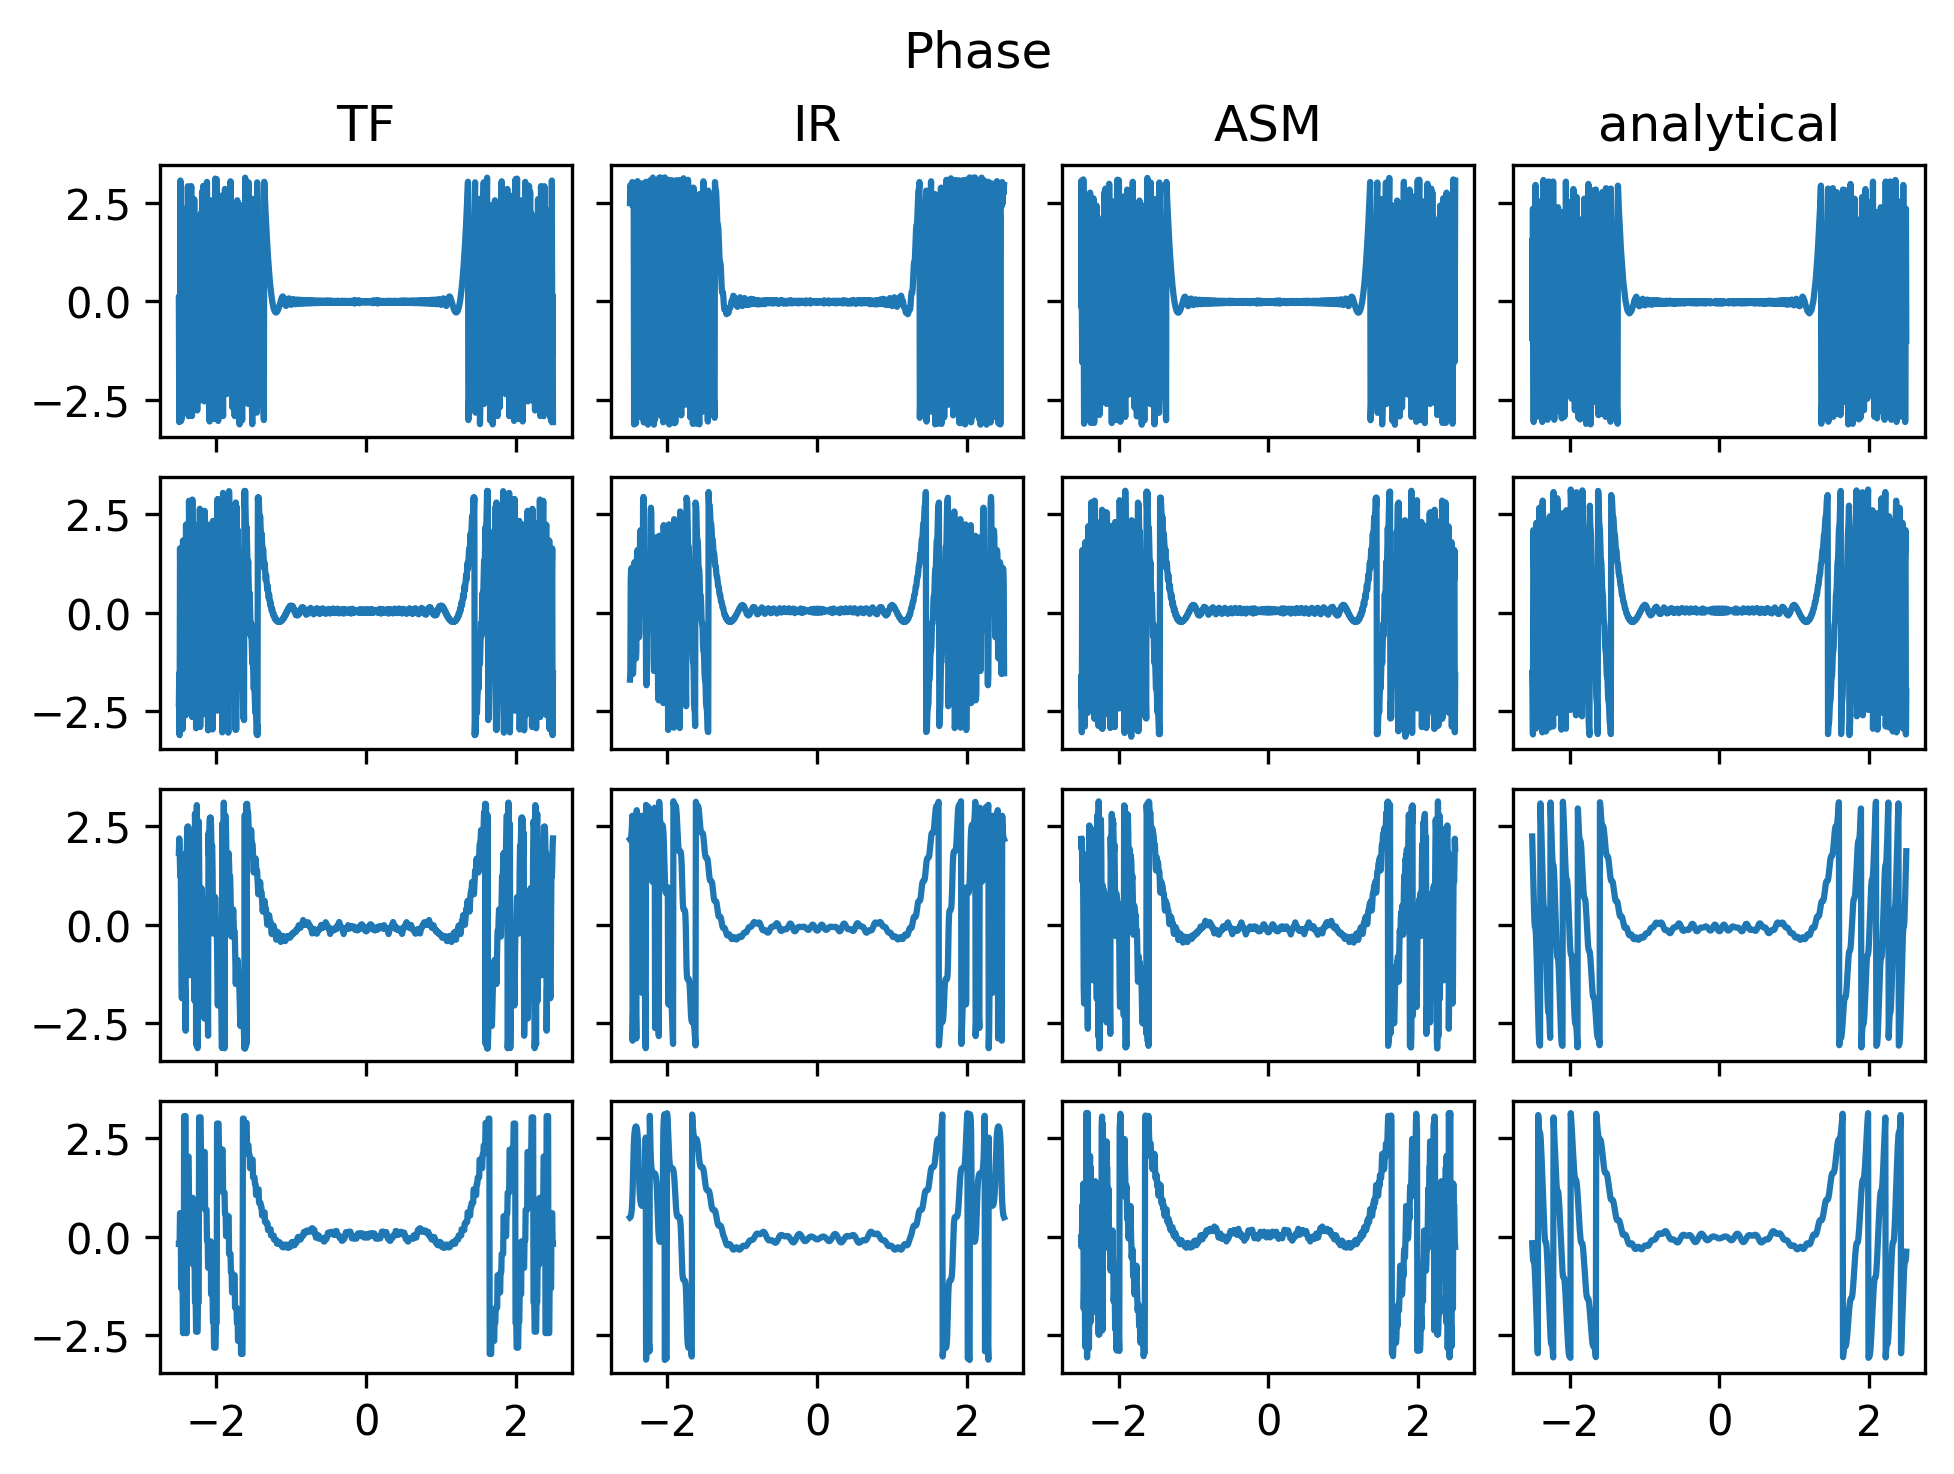

In [12]:

fig, axes = plt.subplots(len(Fpix), 4, dpi=300, sharex=True, sharey=True, layout="constrained")

for i, (ax1, ax2, ax3, ax4) in enumerate(axes):
    ax1.plot(xx.flatten(), np.angle(upropTF[i,n//2,:]))
    ax2.plot(xx.flatten(), np.angle(upropIR[i,n//2,:]))
    ax3.plot(xx.flatten(), np.angle(upropASM[i,n//2,:]))
    ax4.plot(xx.flatten(), np.angle(uprop_ana[i,n//2,:]))

axes[0][0].set_title('TF')
axes[0][1].set_title('IR')
axes[0][2].set_title('ASM')
axes[0][3].set_title('analytical')

fig.suptitle('Phase')

## Disk Aperture

In [13]:
disk2d = fresnel.DiskAperture(structuresize, ndim=2)
u0 = disk2d(xx, yy)

propTF = fresnel.FresnelTFPropagator(u0.shape, Fpix, npad)
uprop = propTF(u0)

uprop_profile = uprop[:,n//2,:]


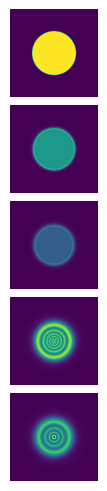

In [14]:
fig, axes = plt.subplots(len(Fpix) + 1, sharex=True, sharey=True, layout="constrained")
axes[0].imshow(intensity(u0))

for ii in range(len(Fpix)):
    axes[ii+1].imshow(intensity(uprop[ii]))
#ax.imshow(intensity(uprop)[0,...])

for ax in axes:
    ax.set_axis_off()

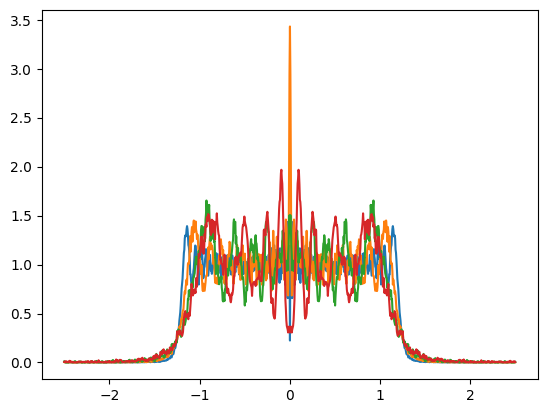

In [15]:
fig, ax = plt.subplots()
for ii in range(len(Fpix)):
    ax.plot(x, intensity(uprop_profile[ii]))

## Circular symmetric propagation using the discrete Hankel transform

We use a different non-uniform grid here, so the Fresnel number are defined differently..
Actually pixel-based Fresnel numbers don't make much sense but we use them anyway...

In [16]:
xmax = n * dx / 2
n_hankel = n

Fhankel = fresnel.FresnelPropagatorCS.calculate_fresnel_numbers(n_hankel, xmax, dz, wl)
# defined with respect to 2 * radius!

propCS = fresnel.FresnelPropagatorCS(n_hankel, Fhankel)

In [17]:
xx_hankel = propCS.grid(xmax) # computation grid
xx_new = np.linspace(-xmax, xmax, n) # interpolated grid

In [18]:
# compute u0 on the sampling points dictated by the Hankel transform
disk1d = fresnel.DiskAperture(structuresize, ndim=1)
u02r = disk1d(xx_hankel)

In [19]:
u2rprop = propCS(u02r) # propagate

# interpolate to uniform sampling
u2rprop_interp = propCS.interpolate(u2rprop, xx_new, xmax)

Text(0.5, 1.0, 'Cylidrical symmetry')

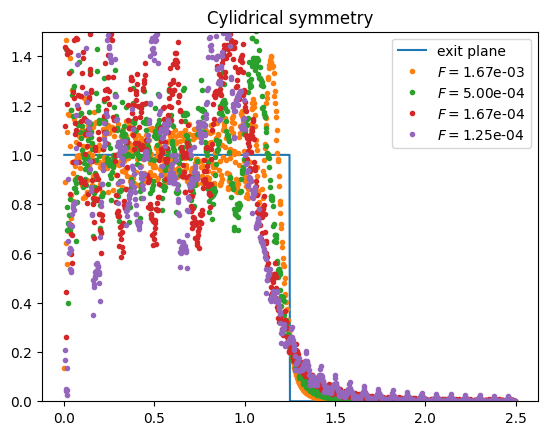

In [20]:
fig, ax = plt.subplots()
ax.plot(xx_hankel, intensity(u02r), label='exit plane')
for ii, Fpixi in enumerate(Fpix):
    ax.plot(xx_hankel, intensity(u2rprop)[ii,:], '.', label=f'$F = ${Fpixi:.2e}')
ax.set_ylim(0,1.5)
ax.legend()
ax.set_title('Cylidrical symmetry')

Text(0.5, 1.0, 'Interpolation for $F = $1.67e-04')

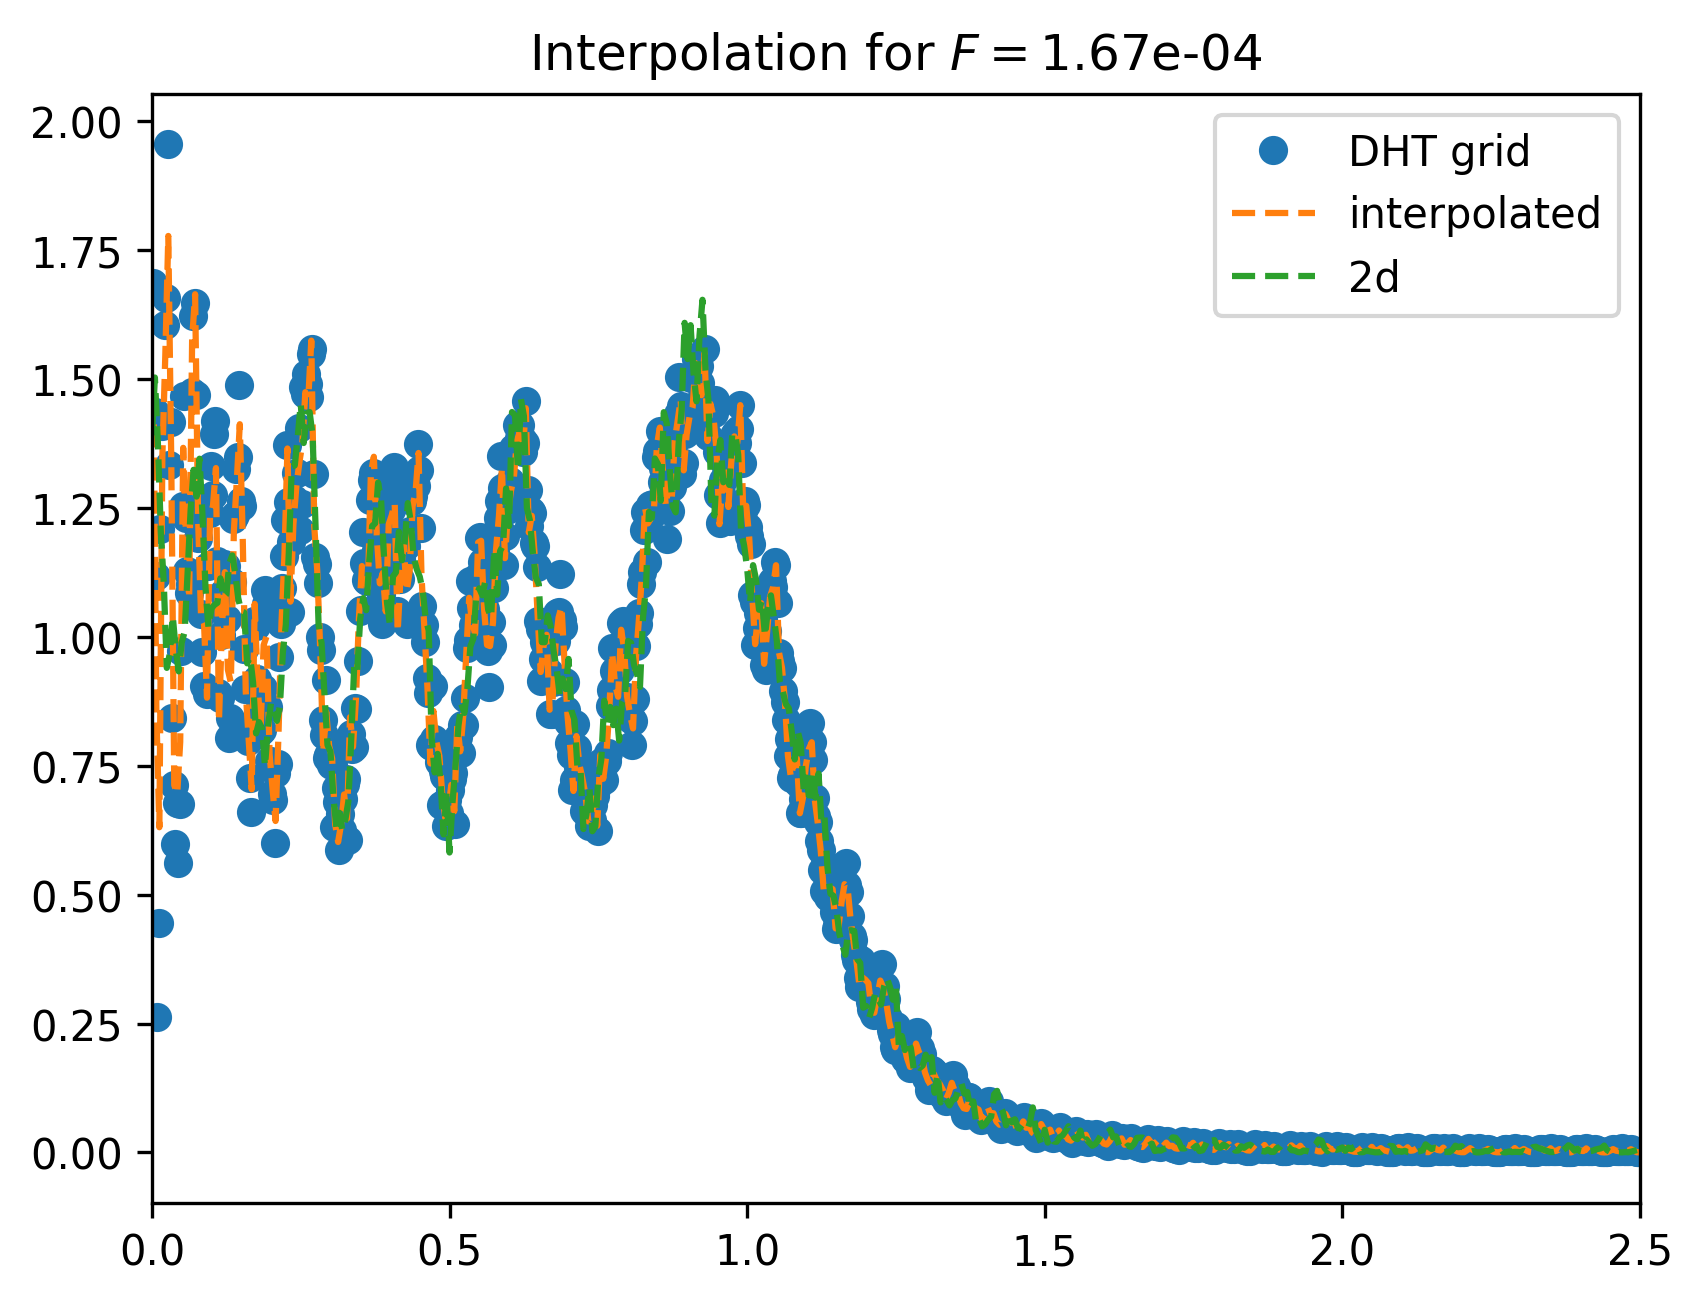

In [21]:
ii = 2
fig, ax = plt.subplots(dpi=300)
ax.plot(xx_hankel, intensity(u2rprop)[ii,:], ls='None', marker='o', label='DHT grid')
ax.plot(xx_new, intensity(u2rprop_interp[ii,:]), ls='--', label='interpolated')
ax.plot(x, intensity(uprop_profile[ii,:]), ls='--', label='2d')

ax.set_xlim(0, xmax)
ax.legend()
ax.set_title(f'Interpolation for $F = ${Fpix[ii]:.2e}')